- Objetivo: Analisar a rede de transferências de jogadores entre clubes de futebol para identificar quais clubes são centrais nas transferências internacionais.
- Dados: Criaremos dados fictícios de transferências de jogadores entre clubes.
- Análise: Usaremos métricas de rede para identificar os clubes mais influentes e os principais destinos e origens das transferências.

### Etapas
- Criação de um Grafo Direcionado: Incluímos clubes de futebol como nós e transferências de jogadores como arestas direcionadas com pesos que representam os valores das transferências.
- Visualização com Matplotlib: Utilizamos o layout circular para uma visualização clara das transferências entre os clubes, destacando valores das transferências nas arestas.
- Cálculo de Métricas e Análise: Calculamos o grau de entrada (total recebido) e saída (total enviado) para cada clube para identificar os principais receptores e pagadores na rede de transferências.

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [4]:
# Lista de clubes
clubs = ['Real Madrid', 'Barcelona', 'Manchester United', 'Liverpool', 'Bayern Munich', 'PSG', 'Juventus', 'Chelsea', 'Manchester City', 'AC Milan']

In [5]:
# Criando um grafo direcionado
G = nx.DiGraph()

# Adicionando nós ao grafo
G.add_nodes_from(clubs)

# Adicionando arestas com pesos aleatórios (representando a taxa de transferência em milhões de euros)
for _ in range(40):  # Criaremos 40 transferências aleatórias
    src = random.choice(clubs)
    dst = random.choice(clubs)
    if src != dst:  # Evitar transferências dentro do mesmo clube
        weight = random.randint(1, 120)  # Taxas de transferência de 1M a 120M de euros
        G.add_edge(src, dst, weight=weight, label=f'€{weight}M')


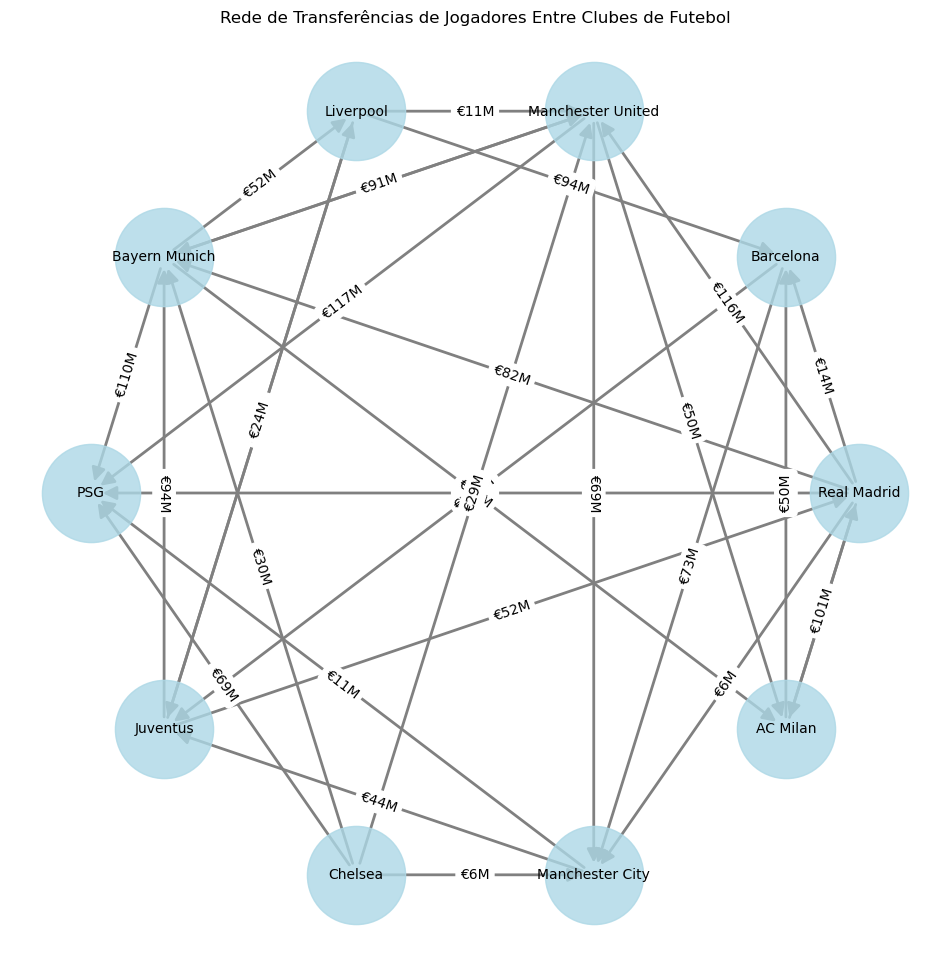

In [6]:
# Visualização do grafo com Matplotlib
plt.figure(figsize=(12, 12))
pos = nx.circular_layout(G)  # Layout circular para melhor visualização dos clubes
edges = G.edges(data=True)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=5000, alpha=0.8)
nx.draw_networkx_labels(G, pos, font_size=10)
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color='gray', width=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['label'] for u, v, d in edges})
plt.title('Rede de Transferências de Jogadores Entre Clubes de Futebol')
plt.axis('off')
plt.show()

In [8]:
# Cálculo de métricas
in_degree = G.in_degree(weight='weight')
out_degree = G.out_degree(weight='weight')
print("Total recebido por clube (Grau de entrada):", dict(in_degree))
print("Total enviado por clube (Grau de saída):", dict(out_degree))

Total recebido por clube (Grau de entrada): {'Real Madrid': 153, 'Barcelona': 158, 'Manchester United': 247, 'Liverpool': 76, 'Bayern Munich': 279, 'PSG': 357, 'Juventus': 253, 'Chelsea': 0, 'Manchester City': 154, 'AC Milan': 118}
Total enviado por clube (Grau de saída): {'Real Madrid': 325, 'Barcelona': 175, 'Manchester United': 309, 'Liverpool': 212, 'Bayern Munich': 264, 'PSG': 0, 'Juventus': 170, 'Chelsea': 134, 'Manchester City': 55, 'AC Milan': 151}


In [9]:
# Identificando o clube com o maior volume total de transferências recebidas
most_receiving_club = max(in_degree, key=lambda x: x[1])
print(f"O clube que mais recebeu foi {most_receiving_club[0]} com um total de €{most_receiving_club[1]}M.")

O clube que mais recebeu foi PSG com um total de €357M.
